<a href="https://colab.research.google.com/github/hmblackwood/Heart_Disease_Project/blob/main/Heart_Disease_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🫀 The Heart Disease Project 🫀

# Summary:
- Using _____, I created a machine learning model that determines whether someone has heart disease based on their medical attributes
- Python libraries used: NumPy, Pandas, Matplotlib, Seaborn, Scikit-Learn
- Models used: Logistic regression, K Nearest Neighbors, Random Forest Classifier


##1. Problem
Given clinical parameters about a patient, can I predict whether or not they have heart disease?


##2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease


##3. Machine Learning Model
I created a model using ______


##4. Evaluation
If I can reach 95% accuracy at predicting whether or not a patient has heart disease, I will consider that a success.
I will evaluate the model using a confusion matric, classification report, precision score, recall score, F1 score an ROC graph.


##5. Features of the Data


# Data Dictionary
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)s, 0=no) (= the predicted attribute)et

# Preparing the Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plots will appear inside notebook
%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Exploratory Data Analysis
My goal is to discover more about the data.
- What question am I trying to solve?
I want to know if I can predict heart disease based on other medical factors. If so, which ones?
- What kind of data do I have and how do I treat different types of data (integers, strings, floats)
- What is mising from the data and how will I deal with missing values?
- What are the outliers and how should they be handled?
- Can I add, change or remove features to get more out of the data?

# Load the Data

In [6]:
# Load the data into a Pandas dataframe so I can visualize and work with it.
# It has 303 rows and 14 columns.
df = pd.read_csv("/content/drive/MyDrive/Heart Disease Project/heart-disease.csv")
df.shape

(303, 14)

In [7]:
# Take a look at the data frame
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
# How many of each class are there?
df.target.value_counts()

,count
target,
1,165
0,138


The target column states whether the patient has heart disease or not. There are 165 cases where the answer is yes to heart disease and 138 where the patient does not have heart disease.

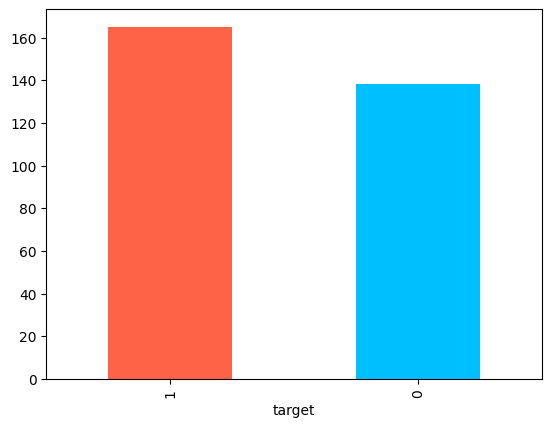

In [15]:
# Plot this information as a bar graph for visualization
df["target"].value_counts().plot(kind="bar", color=["tomato", "deepskyblue"]);

In [16]:
# Check for any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
# Count the number of missing values in each column of the DataFrame.
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


✅ There are zero missing values. In other situations, our data may  not be so clean. In that case, we would have to make choices about how to handle missing data. Some options are:
- Dropping rows or columns with missing values.
- Imputing missing values with statistical measures like the mean or median of the other values in that row or column.
- More advanced methods like KNN (K Nearest Neighbor) where I fill in the missing values by finding "k" nearest neighbors to the missing data point, then using the average of the neighboring values to estimate the missing value.


In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease Frequency by Sex

In [19]:
# See how many males (1) vs females (0) are in this data set.
df.sex.value_counts()

,count
sex,
1,207
0,96


There were 207 males and 96 females. The data is heavily skewed toward males.

In [20]:
# Comare the target (Heart Disease yes/no) column with the sex column.
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Inferences based on this data:
- If someone is female, there is a roughly 75% chance she has heart disease.
72 our of 96 women had heart disease. 72 is from the preceeding cell. 96 is from the count of males/females in the cell above. 24 women did not have heart disease.
- For men, 93 out of 207 have heart disease. That's a 44.9% chance of having heart disease.
* Note that these are inferences based on the data, not on common sense.

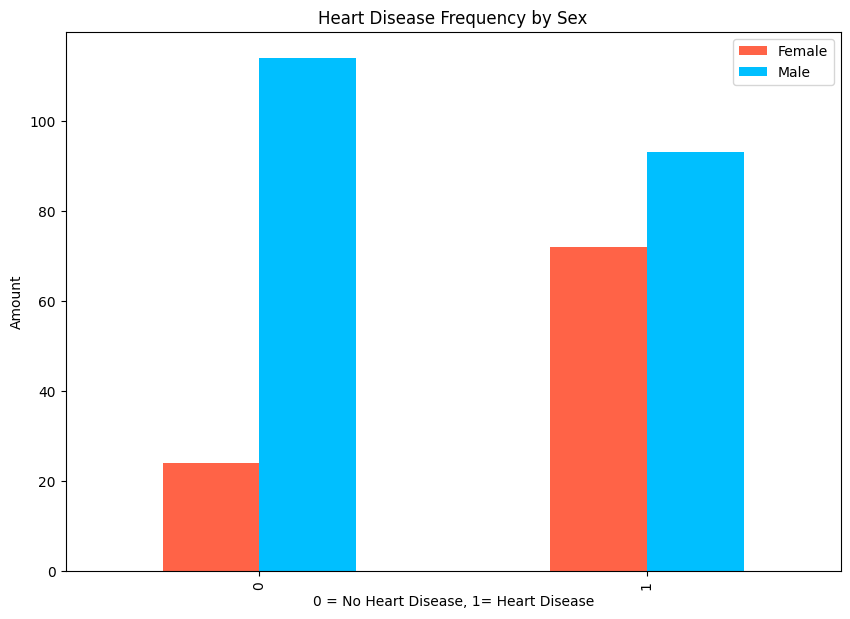

In [21]:
# Create a plot of the cross tab data from above.

# Create a plot of the crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 7),
                                    color=["tomato", "deepskyblue"])

plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0 = No Heart Disease, 1= Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);


# Age vs. Max Heart Rate for Heart Disease